In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data loading

In [2]:
Hotel_Booking = pd.read_csv(r"C:\Users\admin\Desktop\Practice Assignment for Python\hotel_bookings.csv")
Hotel_Booking.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015


# Data Cleaning 

In [3]:
# checking rows and columns count in table
print(f"In Dataset Rows & Column Has: ", Hotel_Booking.shape)

# checking duplicate values in dataset
print(f"The Duplicate value is:", Hotel_Booking.duplicated().sum())

# checking null values
missing_data = Hotel_Booking.isnull().sum()
print(f"The Missing values are as below:\n{missing_data}")

# checking datatypes
Hotel_Booking.dtypes

# changing data types
intdata = ['children', 'agent', 'company']
Hotel_Booking[intdata] = Hotel_Booking[intdata].fillna(Hotel_Booking[intdata].mean()).astype(int)

# checking again datatypes
Hotel_Booking.dtypes

# filling missing values of country column 
Hotel_Booking['country'].fillna(Hotel_Booking['country'].mode()[0],inplace=True)


# # checking  again null values
missing_data = Hotel_Booking.isnull().sum()
print(f"The Missing values are as below:\n{missing_data}")

In Dataset Rows & Column Has:  (119390, 32)
The Duplicate value is: 31994
The Missing values are as below:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                 

C:\Users\admin\AppData\Local\Temp\ipykernel_824\1004936429.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Hotel_Booking['country'].fillna(Hotel_Booking['country'].mode()[0],inplace=True)


# 1. Analyse difference between assigned and reserved room types

In [20]:
# # count of Assigned room & room types
# TOTAL_COUNTS_ASSIGN_ROOM = Hotel_Booking['assigned_room_type'].value_counts() 
# TOTAL_COUNTS_RESERVED_ROOM = Hotel_Booking['reserved_room_type'].value_counts()
# print(f"The counts of both: {TOTAL_COUNTS_ASSIGN_ROOM}, {TOTAL_COUNTS_RESERVED_ROOM}")

The Unique Room type is: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'P']
Room_Type  Assign_Room_Count  Reserved_Room_Count
        A              74053                85994
        D              25322                19201
        E               7806                 6535
        F               3751                 2897
        G               2553                 2094
        C               2375                  932
        B               2163                 1118
        H                712                  601
        I                363                    0
        K                279                    0
        P                 12                   12
        L                  1                    6


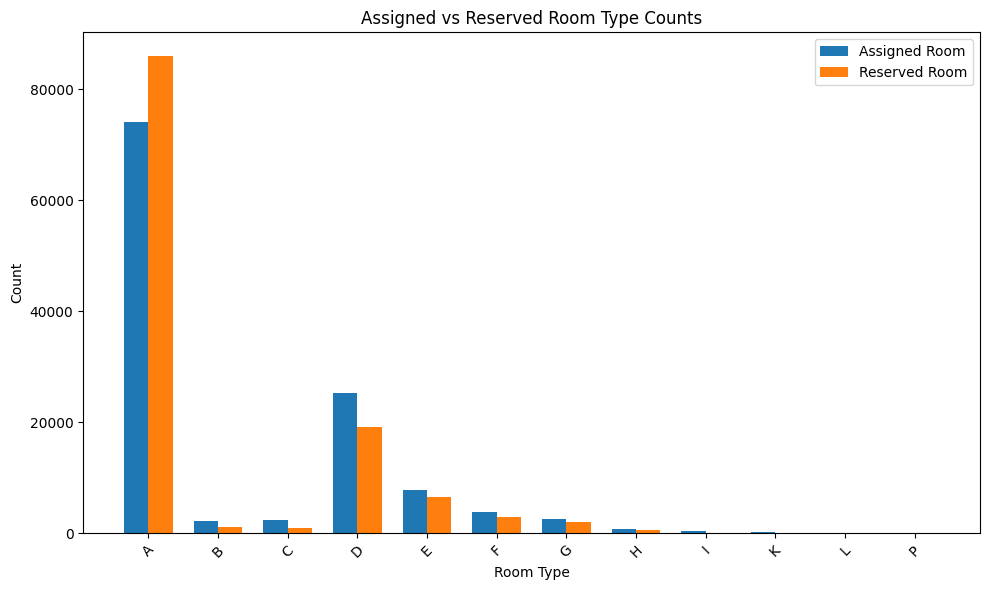

In [34]:
# find unique Room types
all_room_type = pd.unique(pd.concat([Hotel_Booking['assigned_room_type'], Hotel_Booking['reserved_room_type']]))

Room_Types = sorted(all_room_type)
print(f"The Unique Room type is: {Room_Types}")

# calculate assign & reserved room type counts
Assigned_counts = Hotel_Booking['assigned_room_type'].value_counts().sort_index()
Reserved_counts = Hotel_Booking['reserved_room_type'].value_counts().sort_index()

# combine both into dataframe 
Room_Summary = pd.DataFrame({'Room_Type':Room_Types, 'Assign_Room_Count': Assigned_counts.reindex(Room_Types).fillna(0).astype(int).values,
                             'Reserved_Room_Count': Reserved_counts.reindex(Room_Types).fillna(0).astype(int).values})

# Sort by Assigned Count in descending order
room_summary = Room_Summary.sort_values(by='Assign_Room_Count', ascending=False)

print(room_summary.to_string(index=False))

#  Plotting side-by-side column chart
x = np.arange(len(Room_Summary['Room_Type']))  # label locations
width = 0.35  # width of the column

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, Room_Summary['Assign_Room_Count'], width, label='Assigned Room')
plt.bar(x + width/2, Room_Summary['Reserved_Room_Count'], width, label='Reserved Room')

plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Assigned vs Reserved Room Type Counts')
plt.xticks(x, Room_Summary['Room_Type'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



# 2. Which market segment has highest bookings

In [42]:
count_of_Segment = Hotel_Booking['market_segment'].value_counts()
print(f"The Highest Booking of Market_Segment are as below {count_of_Segment}")

The Highest Booking of Market_Segment are as below market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64


# 3. Anlayse pattern in guest arrivals (all the arrival dates months years type of guest married non married couples couples with kids etc. Everything comes under this)

# Monthly Guest Arrivals

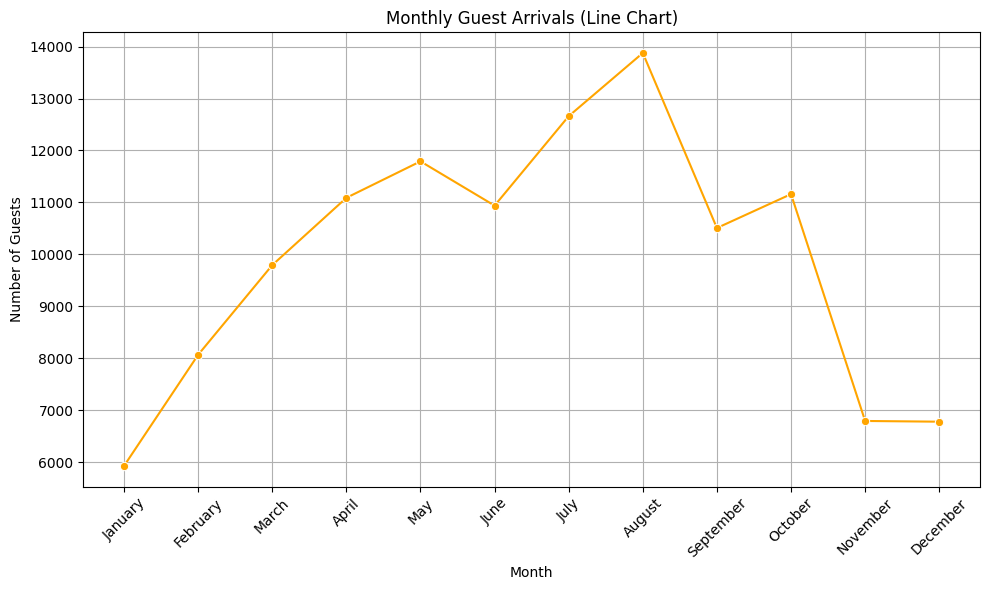

In [43]:
# first we order in months sorting
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

# Ensure the month column is ordered
Hotel_Booking['arrival_date_month'] = pd.Categorical(
    Hotel_Booking['arrival_date_month'],
    categories=months_order,
    ordered=True
)

# Group by month and count bookings
monthly_counts = Hotel_Booking['arrival_date_month'].value_counts().reindex(months_order)

# Plot the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o', color='orange')
plt.title('Monthly Guest Arrivals (Line Chart)')
plt.xlabel('Month')
plt.ylabel('Number of Guests')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Yearly Guest Arrivals

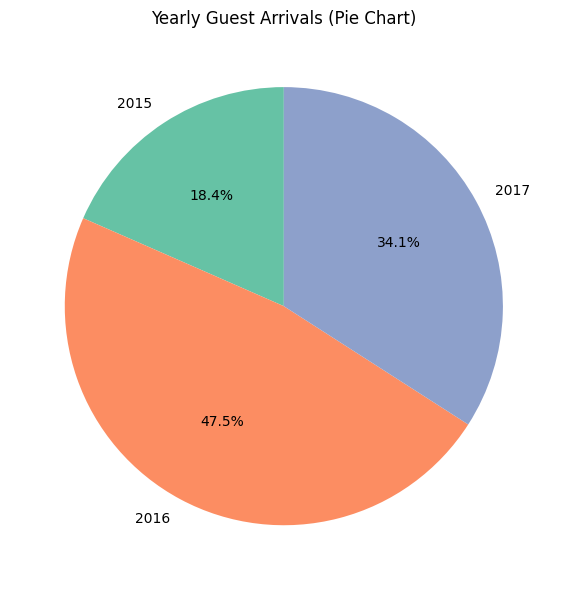

In [58]:
import matplotlib.pyplot as plt

# Count the number of guests per year
yearly_counts = Hotel_Booking['arrival_date_year'].value_counts().sort_index()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(yearly_counts, labels=yearly_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Yearly Guest Arrivals (Pie Chart)')
plt.tight_layout()
plt.show()


# Guest Type Distribution 

C:\Users\admin\AppData\Local\Temp\ipykernel_824\2387227558.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=guest_type_counts.values, y=guest_type_counts.index, palette='Set3')


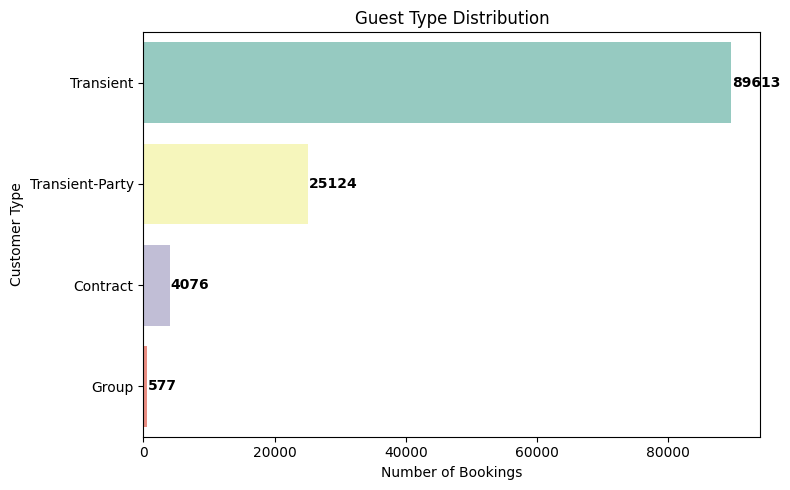

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count each customer type
guest_type_counts = Hotel_Booking['customer_type'].value_counts()

# Plot horizontal bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=guest_type_counts.values, y=guest_type_counts.index, palette='Set3')

# Add labels next to bars
for i, count in enumerate(guest_type_counts.values):
    plt.text(count + 100, i, str(count), va='center', fontweight='bold')

# Chart formatting
plt.title('Guest Type Distribution')
plt.xlabel('Number of Bookings')
plt.ylabel('Customer Type')
plt.tight_layout()
plt.show()



# Married, Unmarried, Family wise guest count

C:\Users\admin\AppData\Local\Temp\ipykernel_824\902692185.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=guest_counts.index, y=guest_counts.values, palette='Set2')


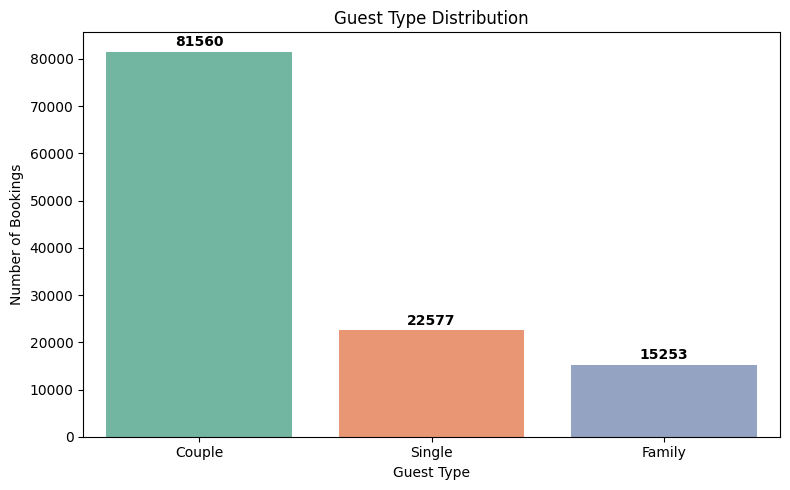

In [50]:
# Define function to classify guest type
def classify_guests(row):
    if row['adults'] == 2 and row['children'] == 0 and row['babies'] == 0:
        return 'Couple'
    elif row['adults'] == 1 and row['children'] == 0 and row['babies'] == 0:
        return 'Single'
    else:
        return 'Family'

# Apply to create new column
Hotel_Booking['guest_type'] = Hotel_Booking.apply(classify_guests, axis=1)

# Count each guest type
guest_counts = Hotel_Booking['guest_type'].value_counts()

# Plot column chart
plt.figure(figsize=(8, 5))
sns.barplot(x=guest_counts.index, y=guest_counts.values, palette='Set2')

# Add labels on top of bars
for i, count in enumerate(guest_counts.values):
    plt.text(i, count + 500, str(count), ha='center', va='bottom', fontweight='bold')

# Chart formatting
plt.title('Guest Type Distribution')
plt.xlabel('Guest Type')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()


 # 4. distribution of “Guest arrivals”

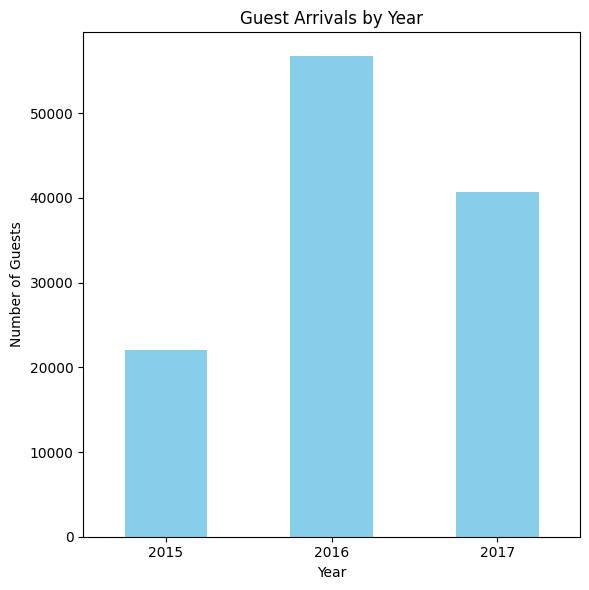

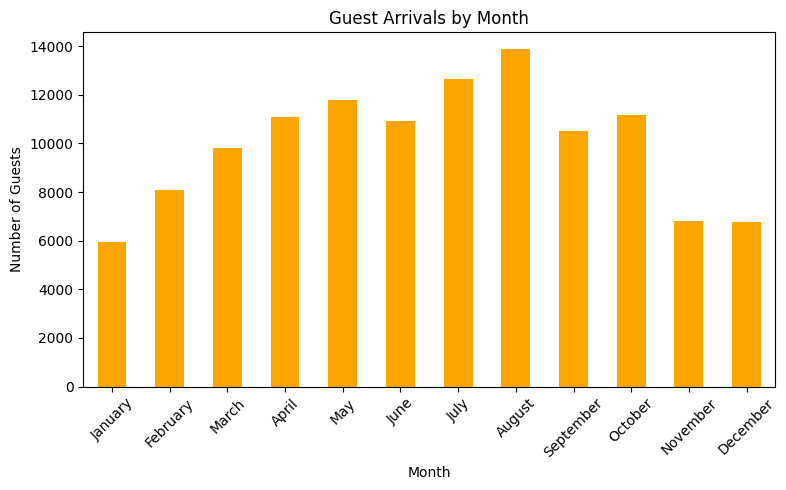

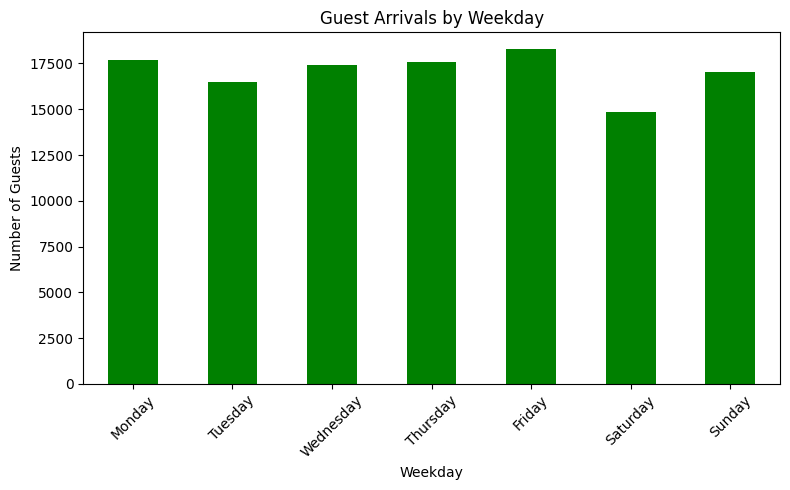

In [59]:
plt.figure(figsize=(6, 6))
Hotel_Booking['arrival_date_year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Guest Arrivals by Year')
plt.xlabel('Year')
plt.ylabel('Number of Guests')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
Hotel_Booking['arrival_date_month'].value_counts().loc[
    ['January','February','March','April','May','June','July','August','September','October','November','December']
].plot(kind='bar', color='orange')
plt.title('Guest Arrivals by Month')
plt.xlabel('Month')
plt.ylabel('Number of Guests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

import calendar

Hotel_Booking['reservation_status_date'] = pd.to_datetime(Hotel_Booking['reservation_status_date'])
Hotel_Booking['arrival_weekday'] = Hotel_Booking['reservation_status_date'].dt.day_name()

plt.figure(figsize=(8, 5))
Hotel_Booking['arrival_weekday'].value_counts().loc[
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
].plot(kind='bar', color='green')
plt.title('Guest Arrivals by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Guests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
